# Hyperparameter tuning in Random Forest Classifier using genetic algorithm

# Introduction

This article presents an introduction on how to fine-tune Machine Learning model using optimization technique :Genetic Algorithm in andom Forest Classifier algorithm.The article encourages data scientists to use this technique in real time scenarios.The main theme of the article is to give a glance at the implementation of the optimization technique: Genetic Algorithm.

Genetic Algorithm is an optimization technique, which tries to find out such values of input so that we get the best output values or results.

The working of a genetic algorithm is also derived from biology, which is as shown in the image below.


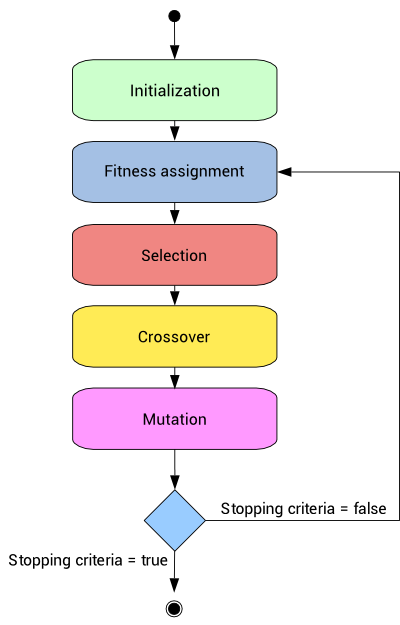

In [2]:
from IPython.display import Image
Image("genetic_algorithm.png")


[ImageSourceLink](https://www.neuraldesigner.com/blog/genetic_algorithms_for_feature_selection)

# Application of Genetic Algorithm
* Engineering Design
* Traffic and Shipment Routing (Travelling Salesman Problem)
* Robotics

# Implementation of Genetic Algorithm using TPOT library

A basic pipeline structure is shown in the image below.


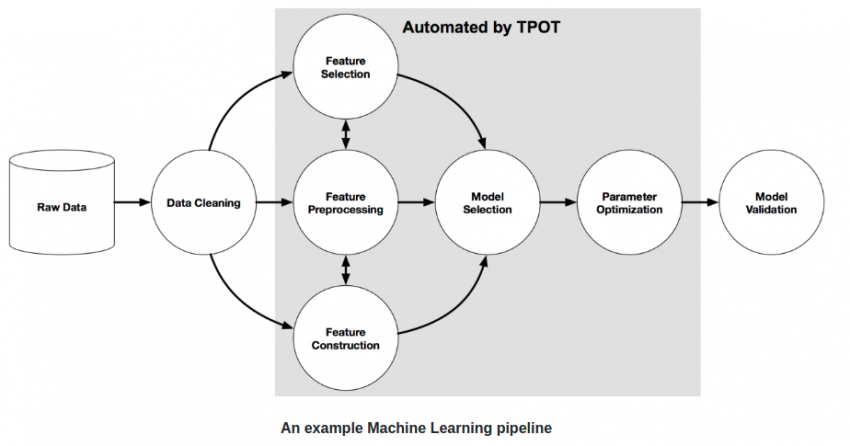

In [5]:
Image("pipeline-850x446.png")

For using TPOT library,we first have to install some existing python libraries on which TPOT is build. So let us quickly install them.
#installing tpot

pip install tpot

# Use Case:Heart Disease Prediction using Random Forest Classifier
 The dataset is collected from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning algorithm Random Forest Classifier to make predictions on whether a person is suffering from Heart Disease or not.

# Import libraries

All the necessary libraries are imported. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, I have used rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. As I am using ensemble technique,feature scaling is not required.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next,Iam importing the Machine Learning algorithm

1. Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Import dataset¶

Note that we have all the libraries we need, now I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [22]:
dataset = pd.read_csv('dataset.csv')

The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
dataset.shape

(303, 14)

The dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [25]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

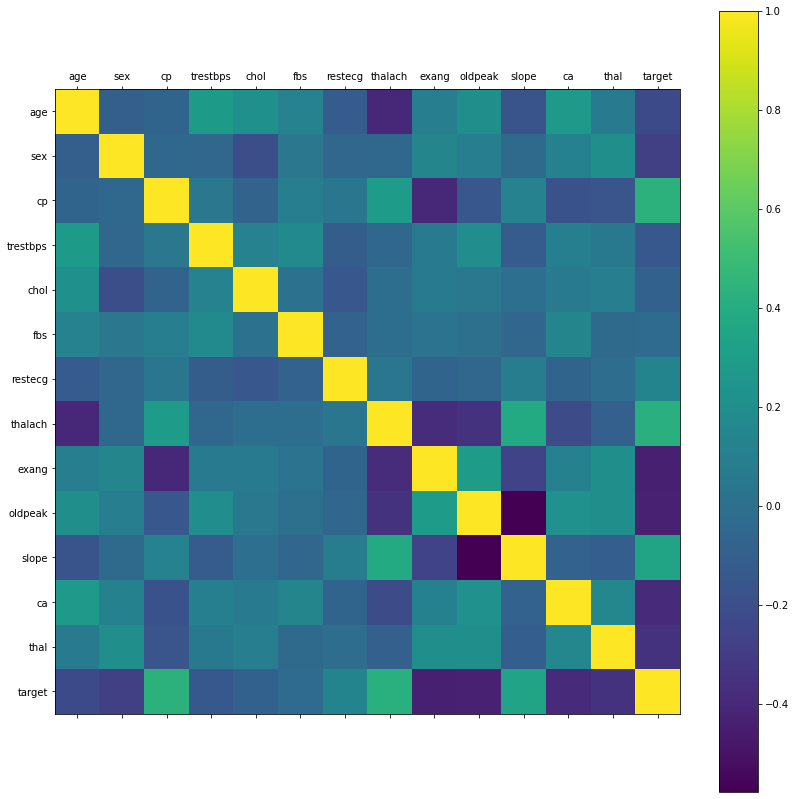

In [26]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

We can see that a few features have negative correlation with the target value while some have positive. 

# Checking size of each Class in the  dataset

Text(0.5, 1.0, 'Count of each Target Class')

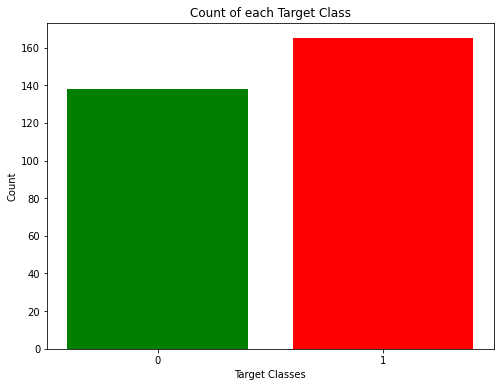

In [27]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

# Data Processing

 We need to convert some categorical variables into dummy variables.I'll use the get_dummies method to create dummy columns for categorical variables.

In [24]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Machine Learning

I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [28]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# Random Forest Classifie
Now, I'll use the ensemble method, Random Forest Classifier, to create the model.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [30]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[42  6]
 [ 9 43]]
0.85
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.88      0.83      0.85        52

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



# The main parameters used by a Random Forest Classifier are:
* criterion = the function used to evaluate the quality of a split.
* max_depth = maximum number of levels allowed in each tree.
* max_features = maximum number of features considered when splitting a node.
* min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
* min_samples_split = minimum number of samples necessary in a node to cause node splitting.
* n_estimators = number of trees in the ensamble.

# Hyperparameter tuning using genetic algorithm

Genetic Algorithms tries to apply natural selection mechanisms to Machine Learning contexts.

Let's consider we create a population of N Machine Learning models with some predifined Hyperparameters.Now We can calculate the accuracy of each model and we can decide to keep just half of the models (the ones that performs best). We can now generate some offsprings having similar Hyperparameters to the ones of the best models so that go get again a population of N models. At this point we can again caltulate the accuracy of each model and repeate the cycle for a defined number of generations. In this way, just the best models will survive at the end of the process.

In [32]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [33]:
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.8471568627450979
Generation 2 - Current best internal CV score: 0.8471568627450979
Generation 3 - Current best internal CV score: 0.8471568627450979
Generation 4 - Current best internal CV score: 0.8521568627450979
Generation 5 - Current best internal CV score: 0.8521568627450979
Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=800), criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [34]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.85


# Conclusion

In this article, hyperparameter tuning in Random Forest Classifier using genetic algorithm is implemented considering a use case.A brief introduction about genetic algorithm is presented and also sufficient amount of insights is given about the use case.

# You Can find my Research Papers from the following Links
1. [Experimental Analysis of the Changes in Speech while Normal Speaking, Walking, Running, and Eating](https://link.springer.com/book/10.1007/978-981-15-1480-7)

2. [Image Quality Assessment for Fake Biometric Detection:Application to Fingerprint and Face Recognition](http://ijaecs.iraj.in/paper_detail.php?paper_id=8043)

3. [Coin Recognition System using Artificial Neural Network on Static Image Dataset](https://ijesc.org/upload/6d1d273d2b56d9a325f1062a8699aa39.Coin%20Recognition%20System%20using%20Artificial%20Neural%20Network%20on%20Static%20Image%20Dataset.pdf)

4.[Facial Expression Recognition](https://www.google.co.in/search?q=facial+expression+recognition+by+sakil+ansari&oq=facia&aqs=chrome.2.69i57j0j35i39j0l3.6320j0j7&sourceid=chrome&ie=UTF-8)

5.[Automatic Cloth pattern and Color Recognition for Visually Impaired People using SVM algorithm](https://edupediapublications.org/journals/index.php/IJR/article/view/6880)

6.[Pattern Recognition Techniques: A Review](https://edupediapublications.org/journals/index.php/IJR/article/view/6961)

7.[Speaker Diarization of Broadcast News audios](http://www.ijeec.com/wp-content/uploads/2017/01/NM270117.pdf)

8.[Implementation of Magnitude and Phase Spectrum Compensation to Achieve an Enhanced Speech Signal](https://www.krishisanskriti.org/vol_image/24Jul201710075304%20%20%20%20%20%20%20Sakil%20Ansari%20%20%20%20%20%20%20%20%20%20%20%20111-114.pdf)

9.[TWITTER SENTIMENT ANALYSIS USING MACHINE LEARNING](https://jespublication.com/upload/2018-V9-I2-02.pdf)

10. [Pattern Recognition :Introduction](https://www.geeksforgeeks.org/pattern-recognition-introduction/)

# Follow on

[LinkedLn](https://www.linkedin.com/in/sakilansari/)

[Github](https://github.com/Sakil786)

[Medium](https://medium.com/@sakilansari4)

[Twitter](https://twitter.com/SakilAnsari94)